# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [4]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [5]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [7]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 

#### Question 2. Create a summary table

In [ ]:
#function

In [8]:
df_raw.describe()

/Users/OldMacBook/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: GRE has a larger standard deviation than GPA because the range of GRE scores is much larger (220 to 800) than the range of GPAs (2.26 to 4.00) 

#### Question 4. Drop data points with missing data


In [9]:
na_rows = pd.isnull(df_raw).any(1).nonzero()[0]
na_rows



array([187, 212, 236])

In [10]:
df_1 = df_raw.dropna()
df_1.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: Before dropping any na values, I wrote the above na_rows function that returns the index number for rows that contain na values. Since there are 400 rows in the dataset and the na_rows function returned that three na values, it follows that there are 397 rows with non-na values. 

#### Question 6. Create box plots for GRE and GPA

800.0
660.0
580.0
520.0
220.0


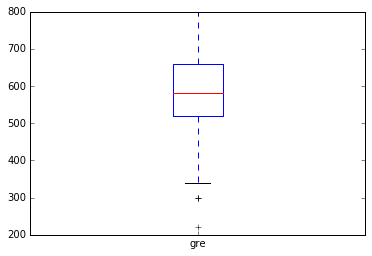

In [11]:
#GRE Boxplot

df_1['gre'].plot(kind='box')
print df_1['gre'].max()
print df_1['gre'].quantile(0.75)
print df_1['gre'].median()
print df_1['gre'].quantile(0.25)
print df_1['gre'].min()


4.0
3.67
3.4
3.13
2.26


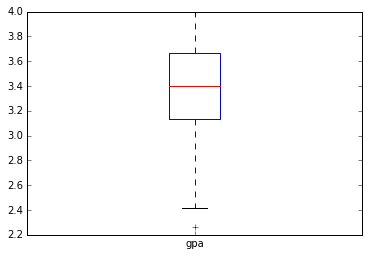

In [12]:
#GPA boxplot

df_1['gpa'].plot(kind='box')
print df_1['gpa'].max()
print df_1['gpa'].quantile(0.75)
print df_1['gpa'].median()
print df_1['gpa'].quantile(0.25)
print df_1['gpa'].min()

#### Question 7. What do this plots show?

Answer: The gre box plot indicates that the maximum gre score for graduate school applicants is 800, that the 75th percent quantile begins at 660, the median is 580, the 25th percent quantile begins at 520 and the minumum score is 220.

The gpa box plot indicates that the maximum gpa score for graduate school applicants is 4.0, that the 75th percent quantile begins at 3.67, the median is 3.4, the 25th percent quantile begins at 3.13 and the minimum score is 2.26.

#### Question 8. Describe each distribution 

-0.146046988216
-0.332864354651
580.0
0    620.0
dtype: float64
587.858942065


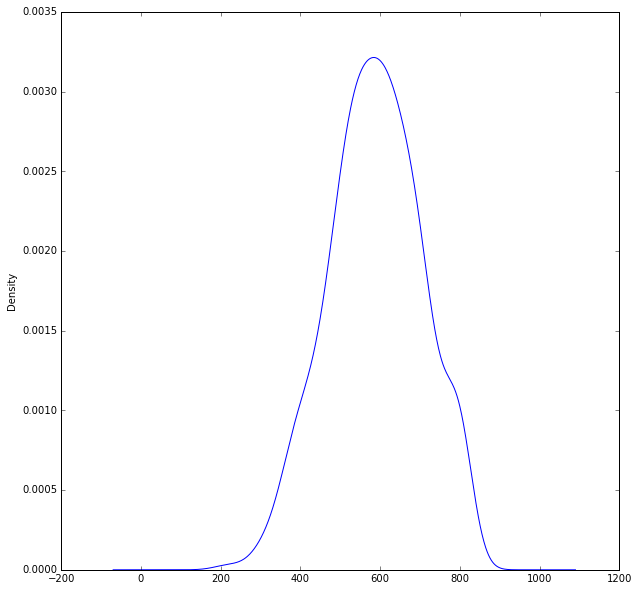

In [13]:
# plot the distribution of each variable 
df_1['gre'].plot(kind="density", figsize=(10,10))
print df_1['gre'].skew()
print df_1['gre'].kurt()
print df_1['gre'].median()
print df_1['gre'].mode()
print df_1['gre'].mean()

-0.216888932969
-0.563569899522
3.4
0    4.0
dtype: float64
3.3922418136


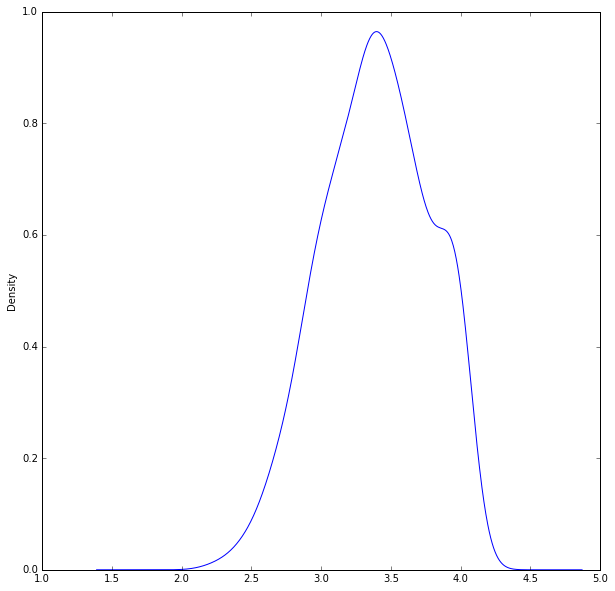

In [14]:
df_1['gpa'].plot(kind="density", figsize=(10,10))
print df_1['gpa'].skew()
print df_1['gpa'].kurt()
print df_1['gpa'].median()
print df_1['gpa'].mode()
print df_1['gpa'].mean()

Both distributions are similar, following a relatively normal distribution curve. However, because the max value for the gre and gpa columns is 800 and 4.0 respectively, the curves stop at those values and therefore have a more negative skew. 

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: Our model would not meet the requirement of a normal distribution. One reason for this is that normal distributions are symmetric around the mean. Another reason is that normal distributions have same the median, mode, and mean, which gre and gpa do not. 

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: I do not believe that the distribution needs correction because it is follows the true values of applicants' gre and gpa scores. Outliers do not skew the shape the distribution.

#### Question 11. Which of our variables are potentially colinear? 

In [18]:
import seaborn as sns
sns.set_style("darkgrid")

import statsmodels.formula.api as smf

               gre       gpa  prestige
gre       1.000000  0.382408 -0.124533
gpa       0.382408  1.000000 -0.060976
prestige -0.124533 -0.060976  1.000000
Axes(0.125,0.125;0.62x0.775)


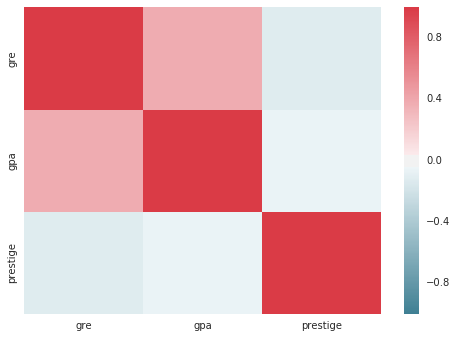

In [20]:
# create a correlation matrix for the data




cmap = sns.diverging_palette(220, 10, as_cmap=True)

correlations = df_1[['gre', 'gpa', 'prestige']].corr()
print correlations
print sns.heatmap(correlations, cmap=cmap)


#### Question 12. What did you find?

Answer: Based on the correlation matrix, it does not appear that any of our variables ('gre', 'gpa', 'prestige') have a strong positive or negative correlation. 

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: In order to properly analyze how the prestige of an applicant's undergraduate school effects college admissions, we would first have to transform the data. Since prestige of undergraduate school is categorical, we would have to create dummy variables using the "getdummies" command. Our dataset would then be formatted appropriately to perform a linear regression and determine whether prestige of undergraduate school is actually predictive of admissions status. 

#### Question 14. What is your hypothesis? 

Answer: My hypothesis is that applicants who have attended undergraduate institutions of higher prestige are more likely to gain admission than those who have did not attend undergraduate institutions of high prestige.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data